In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

iris = datasets.load_iris()

X = iris.data
y = iris.target

print('Class labels:', np.unique(y))


Class labels: [0 1 2]


In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)


In [3]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X_train, y_train)

# generate evaluation metrics
print("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(X_train)))
print("Train - classification report :", metrics.classification_report(y_train, clf.predict(X_train)))

print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Test - Confusion matrix :",metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test)))


Train - Accuracy : 0.9714285714285714
Train - Confusion matrix : [[34  0  0]
 [ 0 31  1]
 [ 0  2 37]]
Train - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.94      0.97      0.95        32
           2       0.97      0.95      0.96        39

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Test - Accuracy : 0.9777777777777777
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98     

In [21]:
# Let's use sklearn make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0,n_classes=2,weights=[0.9,0.2]) 

# build a simple logistic regression model
clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X, y)


KNeighborsClassifier()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


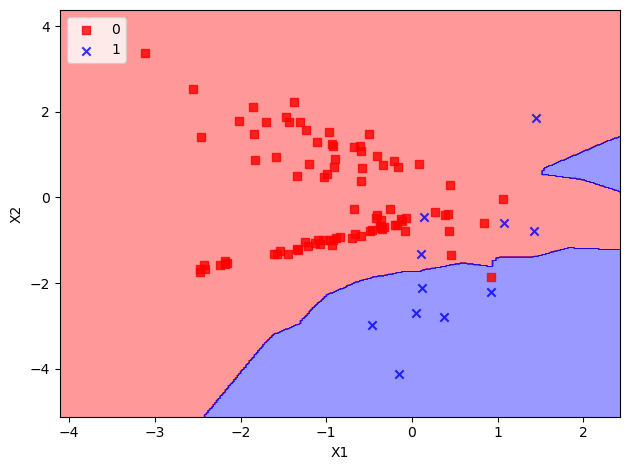

In [22]:
# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [2]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['species'])

# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
iris.head()

X = iris.iloc[:,:3] # independent variables
y = iris.species   # dependent variable
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# K Means Cluster
model = KMeans(n_clusters=3, random_state=11)
model.fit(X)
print(model.labels_)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [3]:
##CONFUSION MATRIX Generation
# since its unsupervised the labels have been assigned
# not in line with the actual lables so let's convert all the 1s to 0s and 0s #to 1s
# 2's look fine
iris['pred_species'] =  np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

print("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species))
print("Classification report :", metrics.classification_report(iris.species, iris.pred_species))


Accuracy : 0.8066666666666666
Classification report :               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        50
         1.0       0.71      0.70      0.71        50
         2.0       0.71      0.74      0.73        50

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



In [4]:
##PLOTTING:
# Set the size of the plot
plt.figure(figsize=(10,7))
 
# Create a colormap for red, green and blue
cmap = ListedColormap(['r', 'g', 'b'])



<Figure size 1000x700 with 0 Axes>

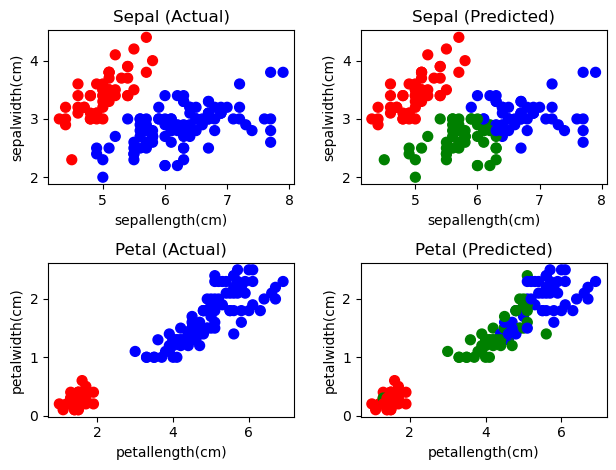

In [5]:
# Plot Sepal
plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=cmap(iris.species), marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Actual)')
 
plt.subplot(2, 2, 2)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=cmap(iris.pred_species), marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Predicted)')

plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=cmap(iris.species),marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 4)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=cmap(iris.pred_species),marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Predicted)')
plt.tight_layout()


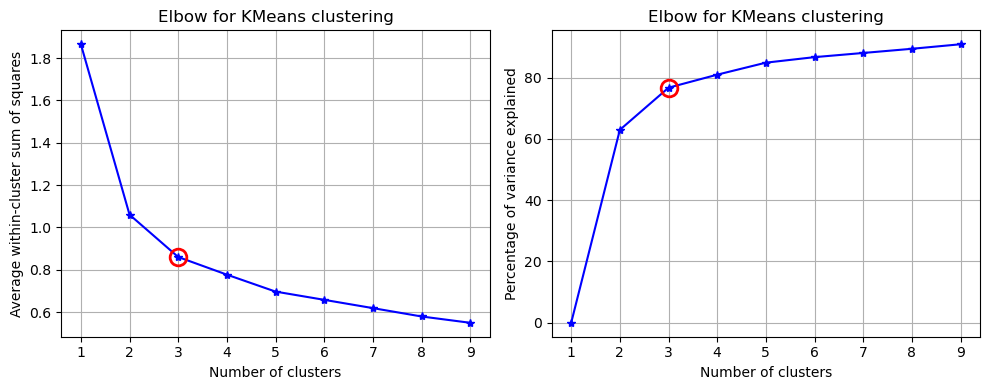

In [11]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

kIdx = 10-1
##### plot ###
kIdx = 2

# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()


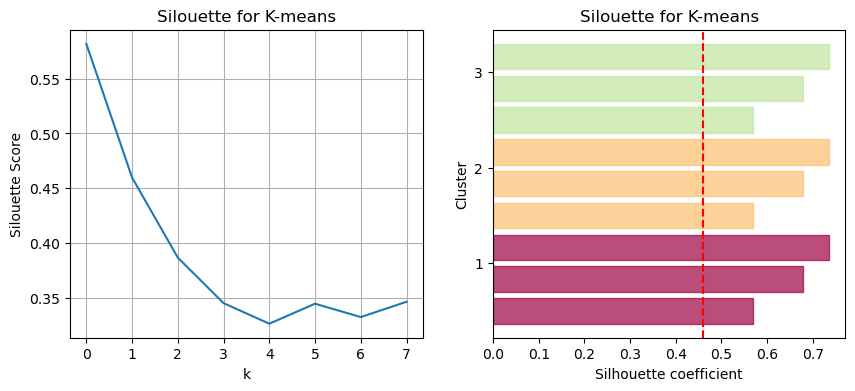

In [13]:
#Average silhouette method
from sklearn.metrics import silhouette_score
from matplotlib import cm

score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    score.append(silhouette_score(X, labels, metric='euclidean'))

    # Set the size of the plot
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(score)
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")

# Initialize the clusterer with n_clusters value and a random generator
model = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
model.fit_predict(X)
cluster_labels = np.unique(model.labels_) 
n_clusters = cluster_labels.shape[0]

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, model.labels_)

plt.subplot(1, 2, 2)

# Get spectral values for colormap.
cmap = cm.get_cmap("Spectral")

y_lower, y_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[cluster_labels]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = cmap(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), c_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)


plt.yticks(yticks, cluster_labels+1)

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title("Silouette for K-means")
plt.show()


In [14]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Cluster
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)

print(model.labels_)
iris['pred_species'] =  model.labels_

print("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species))
print("Classification report :", metrics.classification_report(iris.species, iris.pred_species))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Accuracy : 0.013333333333333334
Classification report :               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       0.00      0.00      0.00        50
         2.0       0.07      0.04      0.05        50

    accuracy                           0.01       150
   macro avg       0.02      0.01      0.02       150
weighted avg       0.02      0.01      0.02       150



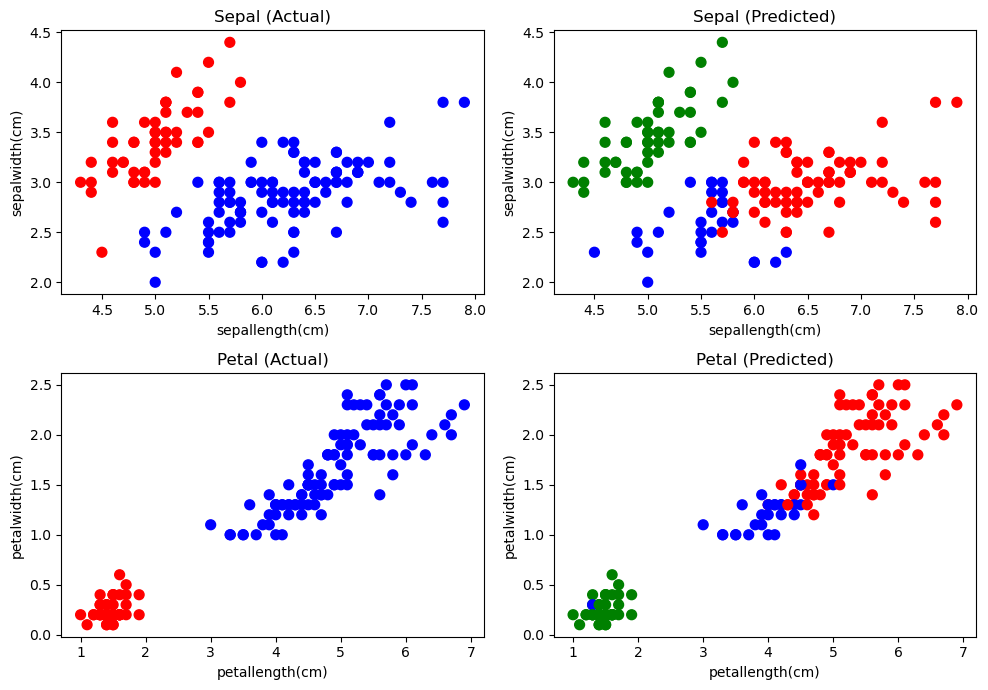

In [16]:
# Set the size of the plot
plt.figure(figsize=(10,7))
 
# Create a colormap for red, green and blue
cmap = ListedColormap(['r', 'g', 'b'])

# Plot Sepal
plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=cmap(iris.species), marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Actual)')
 
plt.subplot(2, 2, 2)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=cmap(iris.pred_species), marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Predicted)')

plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=cmap(iris.species),marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 4)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=cmap(iris.pred_species),marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Predicted)')
plt.tight_layout()


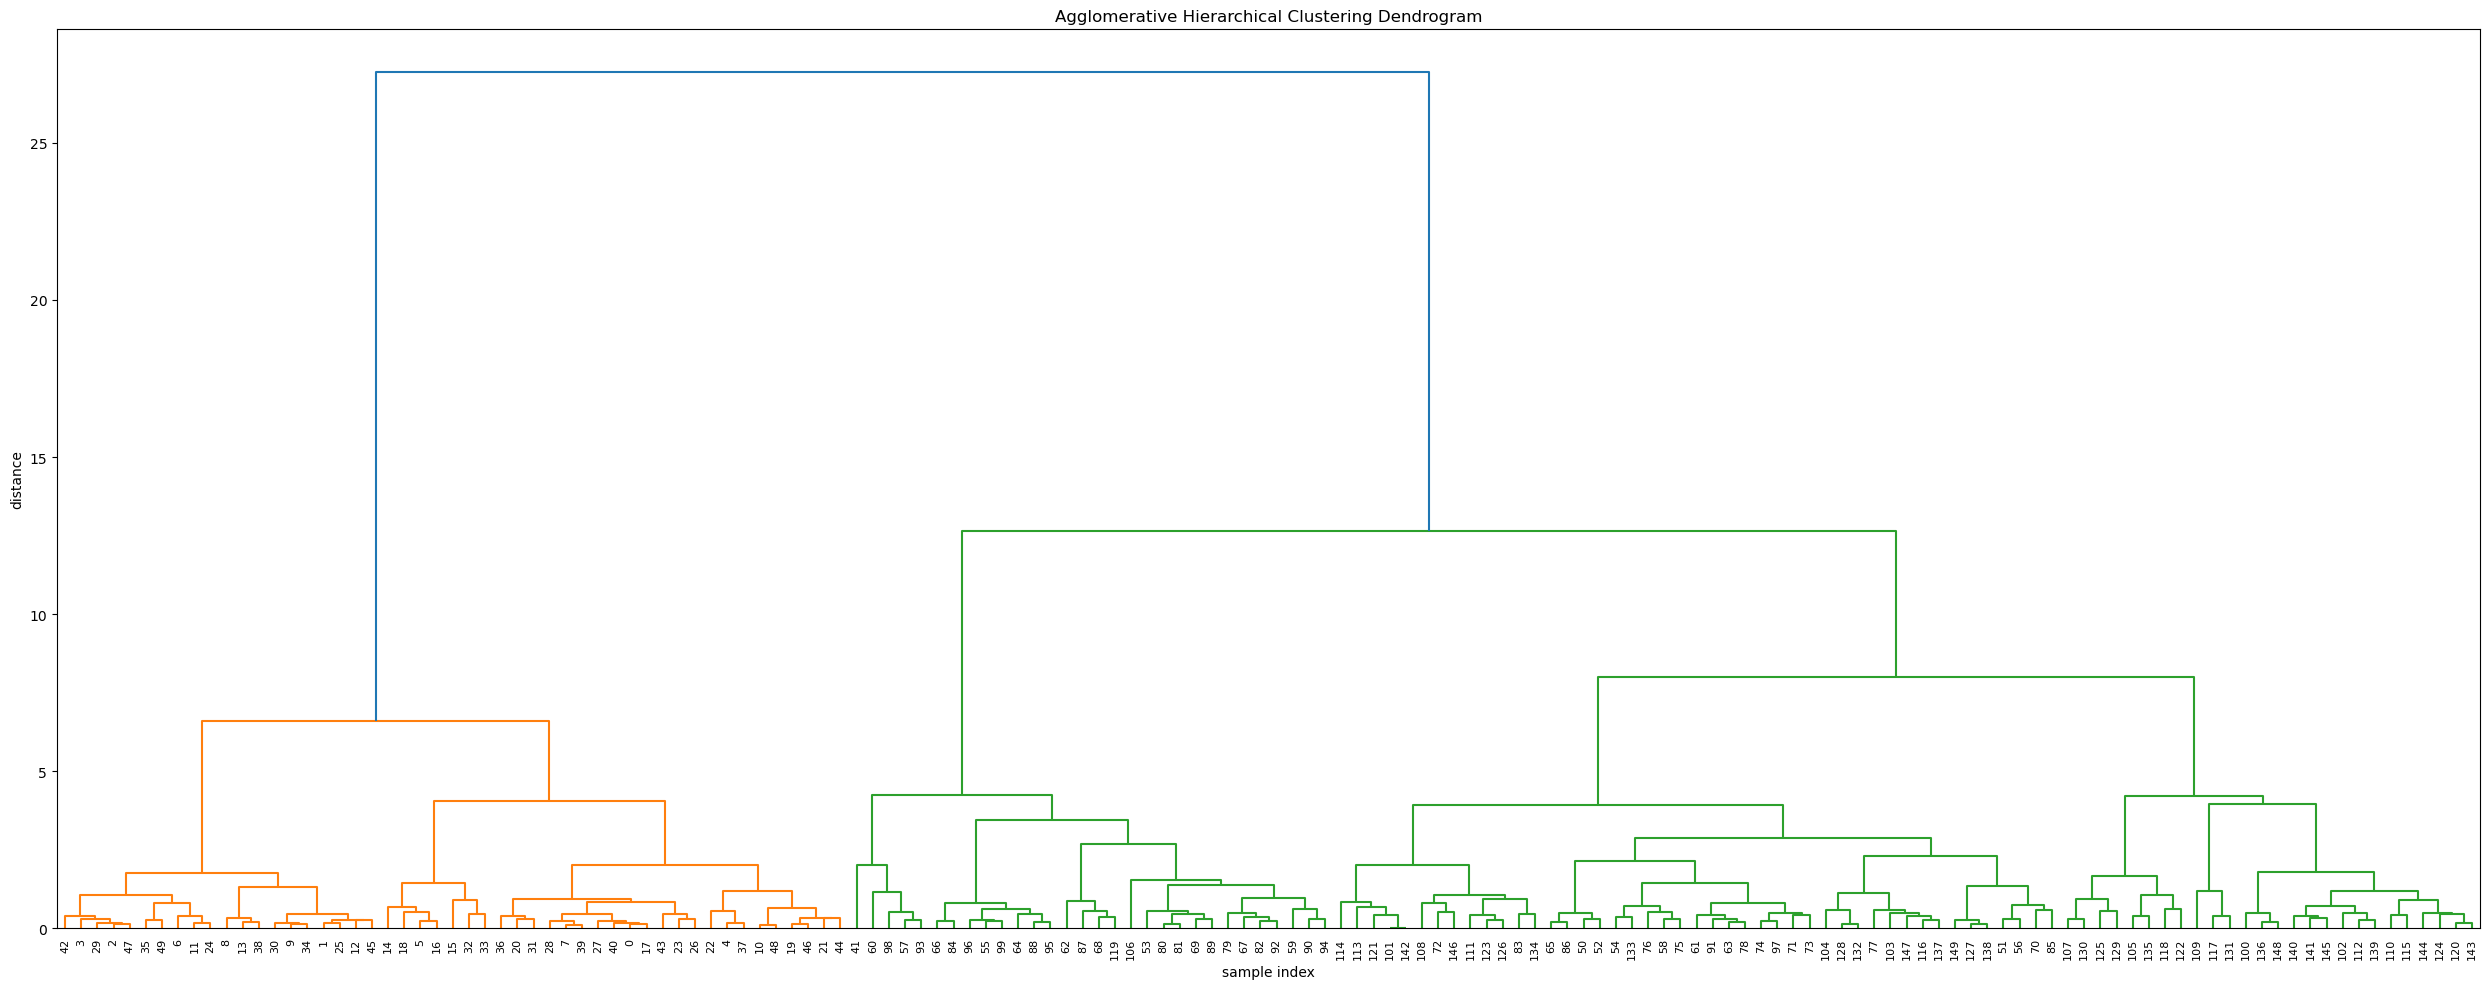

In [17]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

# generate the linkage matrix
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.tight_layout()
